In [7]:
import sys, os
sys.path.append(os.path.abspath(".."))
from aiBrain.FireDetector import FireDetector
from aiBrain.simulate_sensors import generate_rapid_fire_scenarios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [8]:
data = generate_rapid_fire_scenarios(100)
detector = FireDetector(temp_delta_thresh=10, smoke_delta_thresh=200)

In [9]:
results = []

for entry in data:
    pre = detector.preprocess(entry)
    scores = detector.calculate_fire_risk(pre)
    rapid = detector.detect_rapid_rise(pre)
    action = detector.detect_fire(scores, rapid_rise=rapid)
    results.append({
        "timestamp": entry["timestamp"],
        "global_score": scores["global"],
        "rapid_rise": rapid,
        "action": action
    })

In [10]:
df = pd.DataFrame(results)
df.head(10)

,timestamp,global_score,rapid_rise,action
0,2026-01-07T12:23:35.231297,1.0,False,WARNING: start alarm
1,2026-01-07T12:23:49.231297,1.0,True,WARNING: start alarm
2,2026-01-07T12:23:38.231297,1.0,False,WARNING: start alarm
3,2026-01-07T12:23:14.231297,0.0,False,Nothing to do
4,2026-01-07T12:23:53.231297,1.0,True,WARNING: start alarm
5,2026-01-07T12:23:31.231297,1.0,False,WARNING: start alarm
6,2026-01-07T12:22:42.231297,0.0,False,Nothing to do
7,2026-01-07T12:23:00.231297,0.0,False,Nothing to do
8,2026-01-07T12:24:00.231297,1.0,True,WARNING: start alarm
9,2026-01-07T12:22:41.231297,0.0,False,Nothing to do


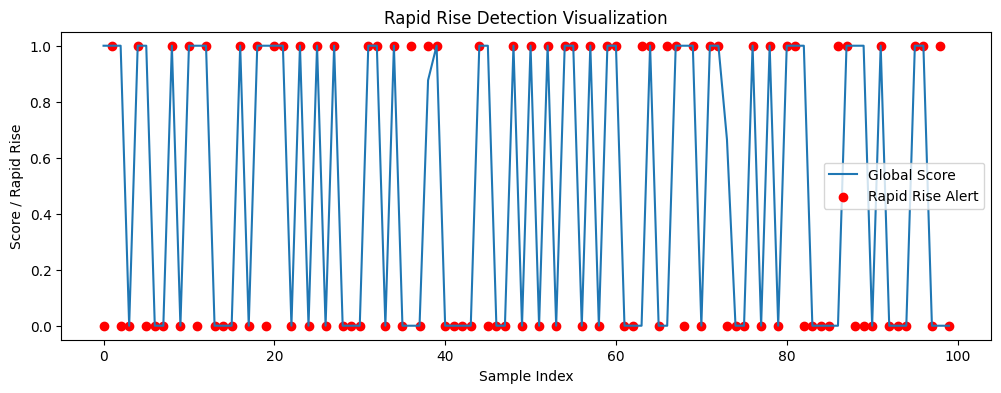

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['global_score'], label='Global Score')
plt.scatter(df.index, df['rapid_rise'].astype(int), color='red', label='Rapid Rise Alert')
plt.xlabel("Sample Index")
plt.ylabel("Score / Rapid Rise")
plt.title("Rapid Rise Detection Visualization")
plt.legend()
plt.show()

In [12]:
y_true = [1]*50 + [0]*50  # fire first, normal after
y_pred = [(1 if r["action"]=="WARNING: start alarm" else 0) for r in results]

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 0.47, Recall: 0.52, F1: 0.50
